#### 01: 获取语料

命令行窗口运行命令，获取维基百科的内容:
```
...\wikiextractor-master> python WikiExtractor.py -b 500M -o wiki zhwiki-20190720-pages-articles-multistream.xml.bz2
```
获取的文本以以下形式保存在`wikiextractor-master\wiki\AA\wiki_00`文件中
```
<doc id="" revid="" url="" title="">
        ...待获取的语料
</doc>
```

#### 02.生成模型

生成 LineSentence 类参数文件

In [ ]:
def parse_zhwiki():
    regex = re.compile("(^<doc.*>$)|(^</doc>$)")

    input_file = open(input_file_path, 'r', encoding='utf-8')
    output_file = open(output_file_path, 'w+', encoding='utf-8')

    line = input_file.readline()

    while line:
        if line != '\n' and not regex.match(line):
            sentences = line.split('。')
            for s in sentences:
                s = zhconv.convert(s, 'zh-cn')
                words = jieba.cut(s.strip('\n'))
                words = ' '.join(words)
                output_file.write(words + '\n')
        line = input_file.readline()

    input_file.close()
    output_file.close()

In [ ]:
parse_zhwiki()

训练模型

In [ ]:
from gensim.models import word2vec

In [ ]:
corpus_path = r'wiki_corpus'
model_path = r"wiki_corpus.model"
def build_model(corpus_path):
    sentences = word2vec.LineSentence(corpus_path)
    model = word2vec.Word2Vec(sentences, size=250)
    model.save(model_path)
    return model

In [ ]:
model = build_model(corpus_path)

#### 03.测试模型

In [1]:
from gensim.models import word2vec
model_path = r"D:\Program\wiki\wiki_corpus_above200.model"
model = word2vec.Word2Vec.load(model_path)

D:\Program\Anaconda3\envs\nlp\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
D:\Program\Anaconda3\envs\nlp\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
model.most_similar('数学')

D:\Program\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('微积分', 0.7541053891181946),
 ('概率论', 0.7444037199020386),
 ('数学分析', 0.7347511053085327),
 ('逻辑学', 0.7225486040115356),
 ('数理逻辑', 0.7190641760826111),
 ('数论', 0.7147524952888489),
 ('高等数学', 0.7125914096832275),
 ('语言学', 0.7068655490875244),
 ('拓扑学', 0.7051428556442261),
 ('计算机科学', 0.7012518048286438)]

In [3]:
model.most_similar('哲学')

D:\Program\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('神学', 0.8052189350128174),
 ('形而上学', 0.7718778252601624),
 ('社会学', 0.7695156931877136),
 ('逻辑学', 0.7685680389404297),
 ('西方哲学', 0.7581016421318054),
 ('历史学', 0.7527497410774231),
 ('经验主义', 0.74122154712677),
 ('认识论', 0.7396582961082458),
 ('哲学思想', 0.7380204200744629),
 ('辩证法', 0.7309457063674927)]

In [4]:
model.most_similar(positive=['女人', '国王'], negative=['男人'])

D:\Program\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('王后', 0.7448828220367432),
 ('王储', 0.6843538284301758),
 ('王室', 0.6505049467086792),
 ('君主', 0.6476876735687256),
 ('摄政王', 0.642572283744812),
 ('乔万娜', 0.6336833238601685),
 ('女王', 0.6320114135742188),
 ('王位', 0.6294428706169128),
 ('摄政', 0.6290799379348755),
 ('罗马教皇', 0.6254087090492249)]

In [5]:
model.most_similar('人工智能')

D:\Program\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('AI', 0.774868369102478),
 ('智能', 0.6861578226089478),
 ('软件工程', 0.6408888697624207),
 ('计算机', 0.6397963762283325),
 ('数据挖掘', 0.6334857940673828),
 ('控制论', 0.6317644715309143),
 ('机器人学', 0.6309504508972168),
 ('模式识别', 0.6307817697525024),
 ('计算机技术', 0.6281515955924988),
 ('人工神经网络', 0.6263296604156494)]

In [6]:
two_corpus = ["腾讯","阿里巴巴"]
res = model.similarity(two_corpus[0],two_corpus[1])
print("similarity:%.4f"%res)

similarity:0.7234


D:\Program\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


#### 04.可视化

In [7]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [8]:
word_vectors = model.wv

In [9]:
def get_model_matrix(word_vectors, required_words):
    import random
    words = list(word_vectors.vocab.keys())
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(word_vectors.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(word_vectors.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind


In [10]:
words = ['数学', '算术', '公理', '积分', '统计', '善恶', '哲学', '伦理', '中国政府', '美国国会',
             '武侠小说', '风靡', '海内外', '受欢迎', '通俗小说', '中华人民共和国', '文化大革命', '反思',
             '伤痕', '一批', '白话文', '诗人', '古诗', '欢迎', '中华民国', '撤退', '台湾',  '区别',
             '思潮', '过渡时期', '通称', '文献', '兴趣', '钻研', '语言学', '神秘主义', '更加', '经典',
             '历史学', '文学', '学术界', '享有', '前所未有', '趋势', '受到', '人文主义者',
             '巨量', '规则', '机器人', '精准', '身躯', '脑', '视频', '确保', '高质量',
             '适中', '价格', '软件设计', 'David', '构成', '互补', '并行',
             '系统分析', '程序设计', '支持', '高级', '课程', '训练', '工业', '技能', '羧酸', '柠檬酸',
             '高效率', '肽键', '细胞骨架', '细胞周期', '氯仿', '甘油', '变型', '鞘', '类固醇', '醛', '酮',
             '糖原', '单糖', '半乳糖', '葡萄糖', '糖苷键', '含氮', '杂环', '嘌呤', '辅酶', '底物',
             '化学能', '磷酸化', '哈康', '延斯', '挪威海', '捕鲸', '挪威政府', '成人礼', '巴伦支海', '哥德堡',
             '区域规划', '润州', '邳州市', '东海县', '丹阳市', '武进区', '临河', '嘈杂', '霰弹枪', '讲席',
             '一滴', '调换', '香港金融管理局', '美圆', '金管局', '毫', '大额', 'Bruce', '铜币', '一圆',
             '镍币', '21.4', '爆竹', '管理科', '中区', '收兑', '财政司'
             ]

In [11]:
M, word2Ind = get_model_matrix(word_vectors, words)

Putting 10000 words into word2Ind and matrix M...
Done.


svd 降维

In [12]:
def reduce_to_k_dim(M, k=2):
    n_iters = 10
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)
    print("Done.")
    return M_reduced

In [13]:
M_reduced = reduce_to_k_dim(M)

Running Truncated SVD over 10130 words...
Done.


In [18]:
def plot_embeddings(M_reduced, word2Ind, words):
    fig, ax = plt.subplots(1, 1, figsize=(24,24))
    for word in words:
        index = word2Ind[word]
        x, y = M_reduced[index]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x, y, word, fontsize=9)
   

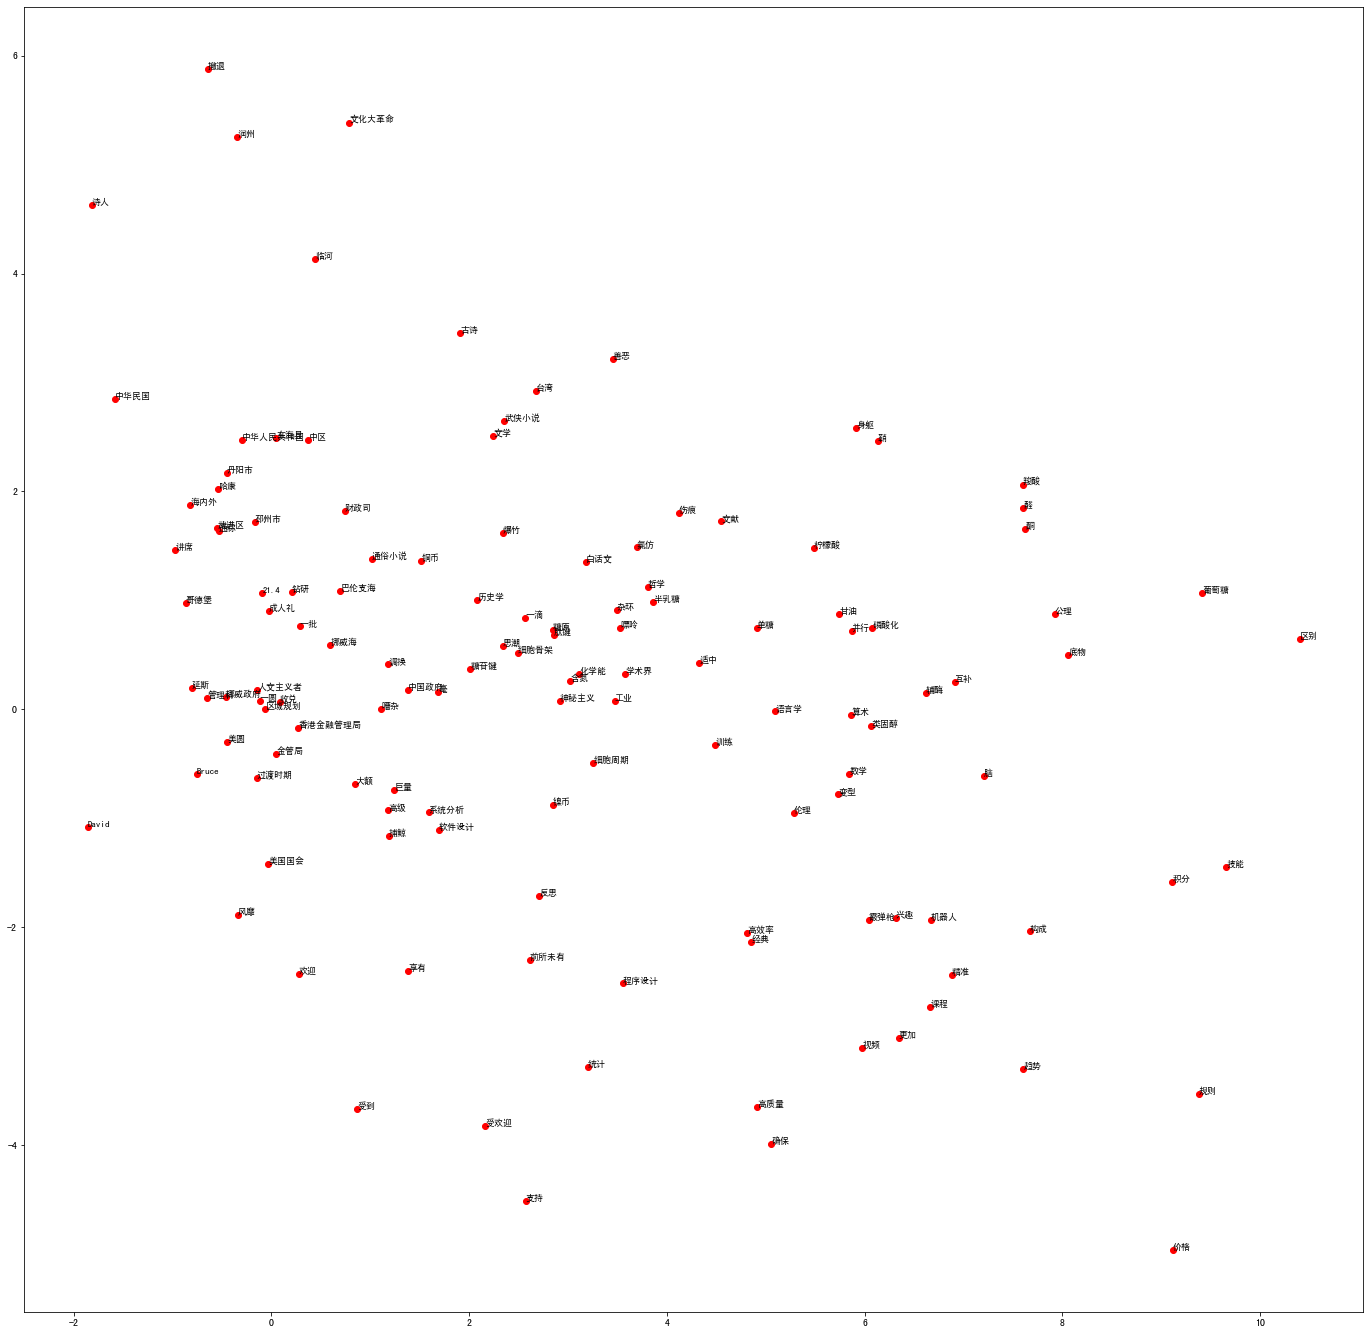

In [19]:
plot_embeddings(M_reduced, word2Ind, words) 

TSEN进行词向量的可视化

In [20]:
from sklearn.manifold import TSNE

In [21]:
def tsne_plot(M, word2Ind, words):

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    M_reduced = tsne_model.fit_transform(M)

    fig, ax = plt.subplots(1, 1, figsize=(32, 32))
    for word in words:
        index = word2Ind[word]
        x, y = M_reduced[index]
        ax.scatter(x, y, marker='o', color='red')
        ax.text(x, y, word, fontsize=9)
    

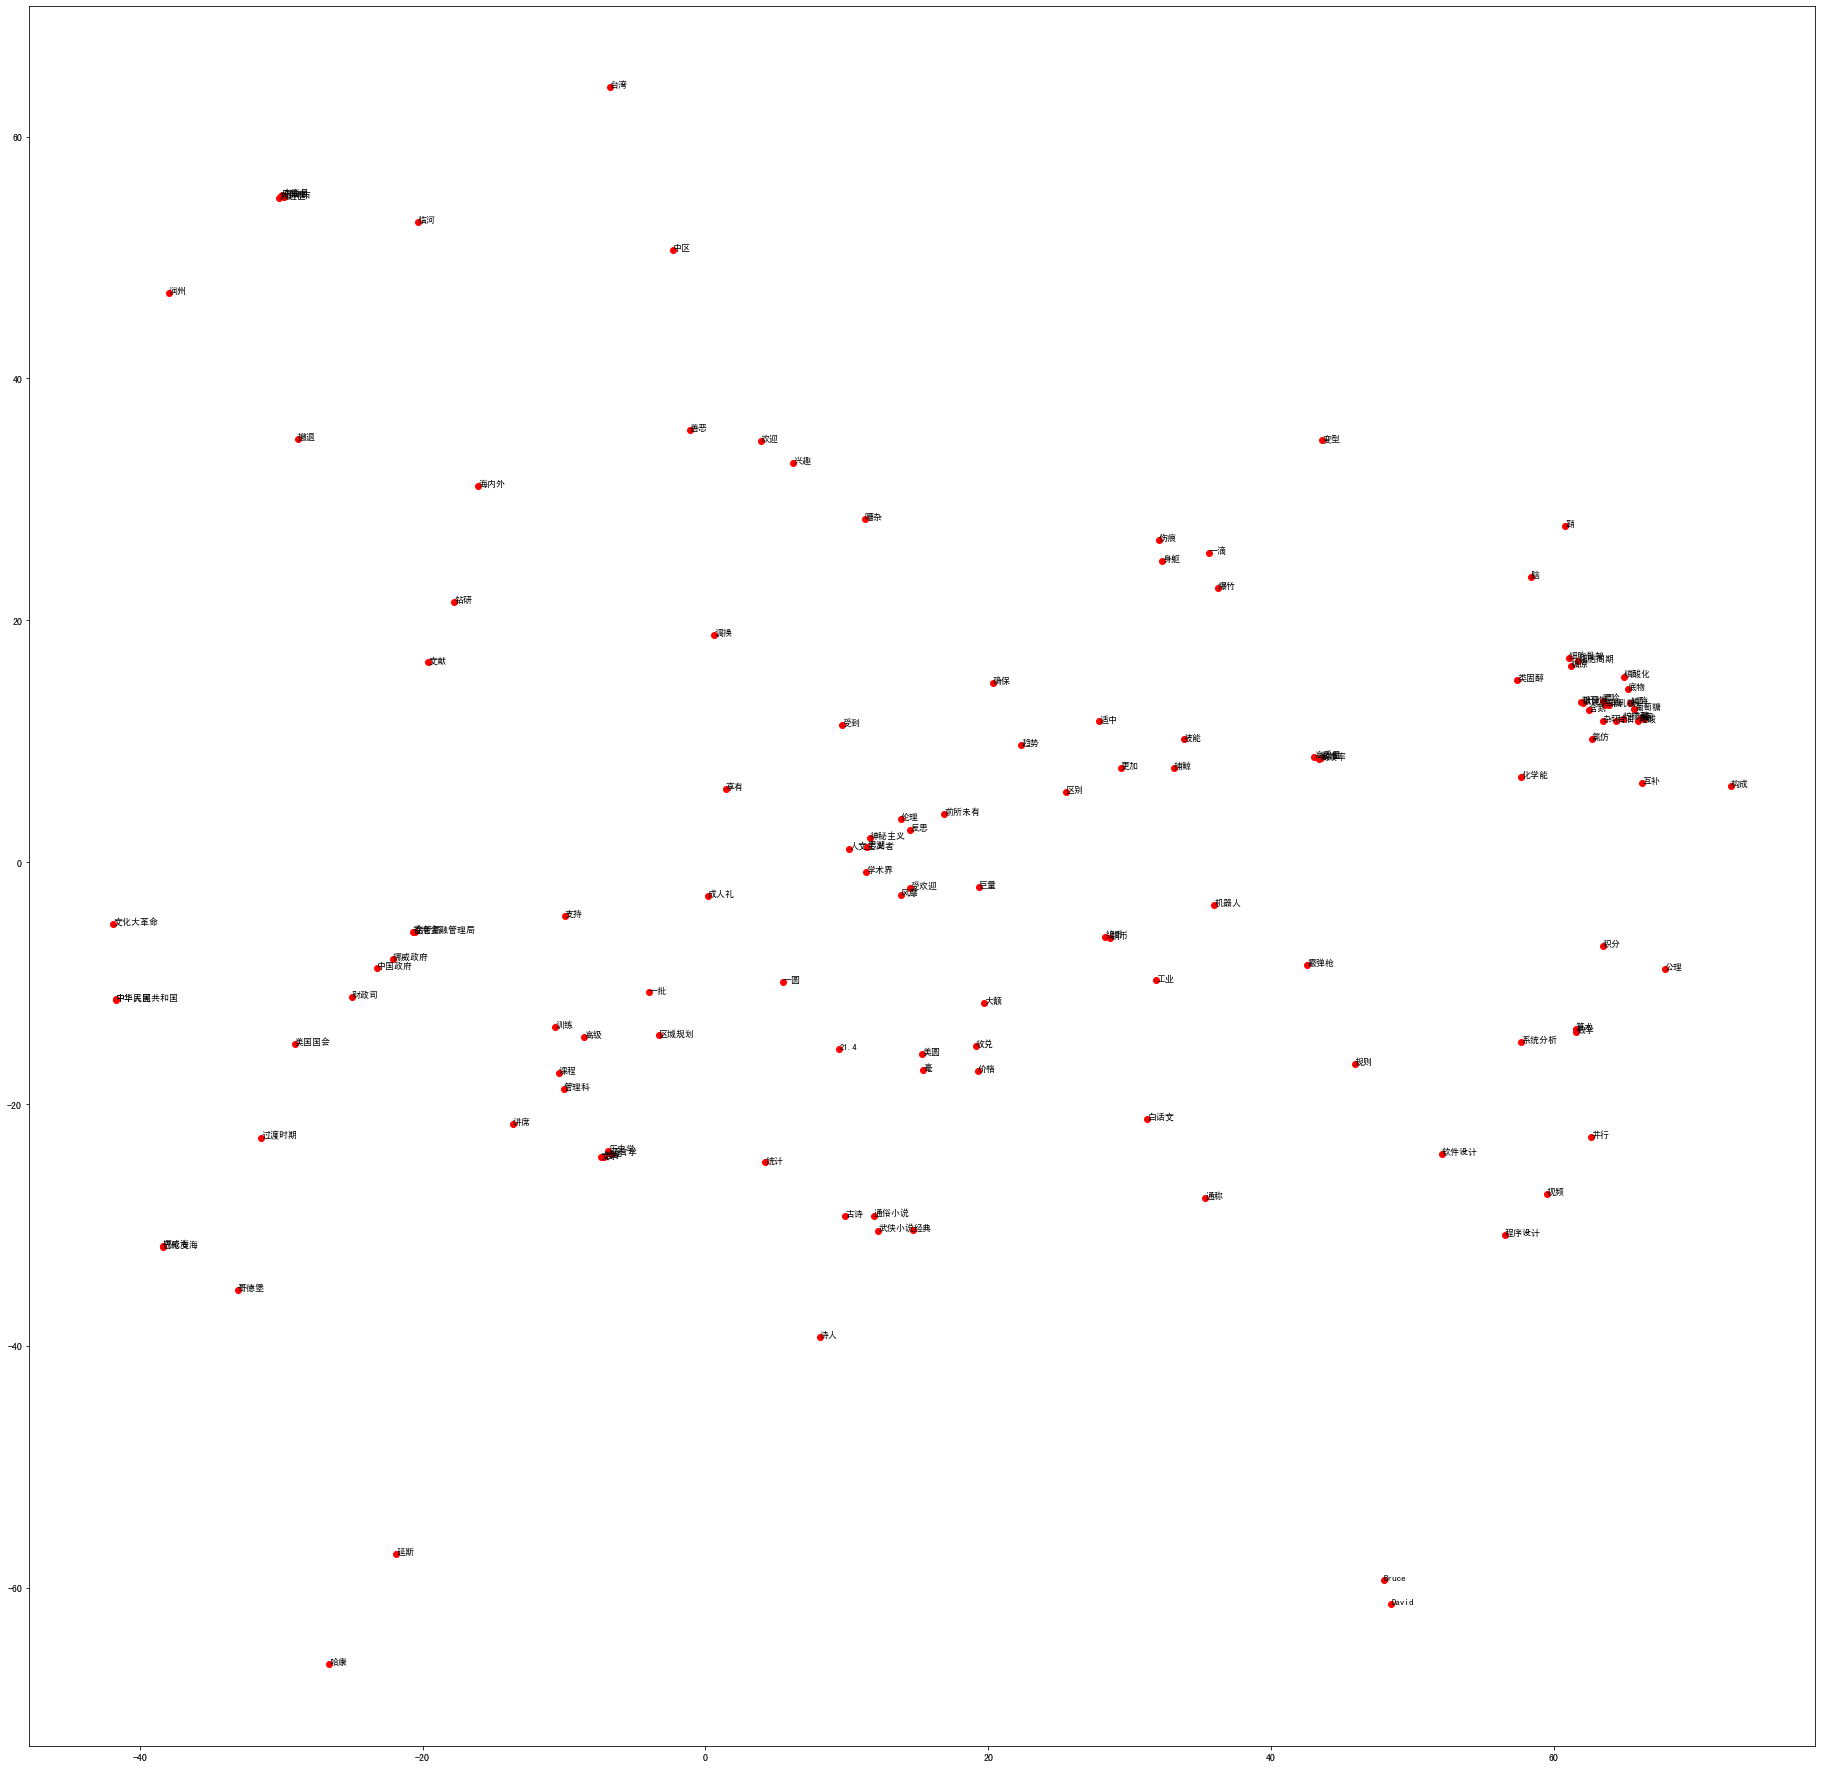

In [22]:
tsne_plot(M, word2Ind, words)

TSNE方法效果好于svd